Analyzing Data

In [9]:
#data 분석
import pandas as pd
import numpy as np

#시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
#데이터 불러와서 각각 train & test라는 변수명에 저장
train = pd.read_csv('C:\\Users\\wooho\\Desktop\\머신러닝\\타이타닉데이터\\titanic_train.csv')
test = pd.read_csv('C:\\Users\\wooho\\Desktop\\머신러닝\\타이타닉데이터\\test.csv')

In [45]:
#학습데이터정보 출력
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [55]:
#fillna함수를 이용해서 age의 Null값을 평균으로 설정, 나머지 칼럼은 'N'값으로 변경
train['Age'].fillna(train['Age'].mean(), inplace=True)
train['Cabin'].fillna('N', inplace=True)
train['Embarked'].fillna('N', inplace=True)

#데이터 세트 Null값 개수 출력
print(train.isnull().sum().sum())

0


In [75]:
#Sex, Cabin, Embarked문자열 피쳐의 값 분류 살펴보기
print(train['Sex'].value_counts())
print('-'*40)
print(train['Cabin'].value_counts())
print('-'*40)
print(train['Embarked'].value_counts())

male      577
female    314
Name: Sex, dtype: int64
----------------------------------------
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
D                3
F2               3
F33              3
E101             3
B28              2
C123             2
E24              2
C83              2
C126             2
B18              2
D33              2
E67              2
E8               2
D20              2
D36              2
B20              2
B5               2
B51 B53 B55      2
E33              2
C65              2
C92              2
D35              2
F G73            2
B22              2
C68              2
              ... 
E58              1
B78              1
F38              1
E68              1
C101             1
C49              1
E17              1
A24              1
B102             1
E40              1
C118             1
C86              1
C50              1
C106             1
D30              1
C45              1
A20           

In [81]:
#Cabin의 경우 앞 문자만 추출. B51, B55등등도 다 같은 객실등급임 결국. 따라서 앞글자만 정렬한다.
train['Cabin'] = train['Cabin'].str[:1]
#다시 피쳐의 값 분류 출력
print(train['Cabin'].value_counts())

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


In [93]:
#성별에 따른 생존자 수 출력
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

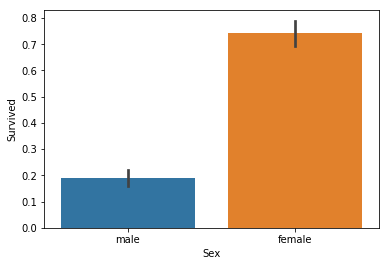

In [95]:
#seaborn 패키지로 X축에 Sex, Y축은 Survived로 barplot을 그려라
sns.barplot(x='Sex', y= 'Survived', data=train)

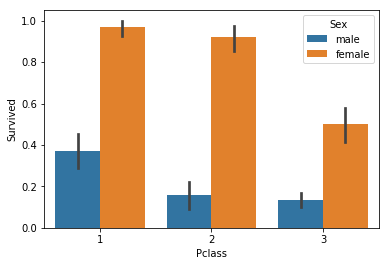

In [104]:
#객실 등급별 생존 확률 #hue 파라미터를 이용해 나타내라
sns.barplot(x='Pclass', y='Survived', hue = 'Sex', data=train)

In [129]:
#Age에 따른 분류. 0~5는 baby 6~12는 Teenager 12~19는 Student 20~35는 young adult 36~60세는 adult 61세 이상은 Elderly로 분류 
#-1 이하의 오류값은 Unknown으로 분류
#get_category(X)는 입력값으로 'Age' 칼럼 값 받아서 해당하는 cat 반환

def get_category(age):
    cat=''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'baby'
    elif age <= 12: cat = 'Teenager'
    elif age <= 19: cat = 'Student'
    elif age <= 35: cat = 'YoungAdult'
    elif age <= 60: cat = 'adult'
    else : cat = 'Elderly'
        
    return cat

#막대그래프의 크기 figure를 더 크게 설정, figsize 10,6
plt.figure(figsize=(10,6))
group_names = ['Unknown', 'baby', 'Teenager', 'Student', 'YoungAdult', 'adult', 'Elderly']

#lamda식에 위에서 생성한 get_category()함수를 반환값으로 지정.
train['Age_cat'] = train['Age'].apply(lambda x : get_category(x))

#preview the data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,YoungAdult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,YoungAdult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,YoungAdult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,YoungAdult


<Figure size 720x432 with 0 Axes>

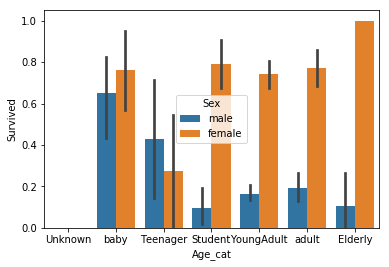

In [130]:
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=train, order=group_names)

Visualizing Data